# CLUSTER IMPORT

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
%matplotlib inline


import seaborn as sb
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import metrics


import math
import scipy.stats as stats
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [4]:
Data1=pd.read_csv('words_glasgow.csv',skipinitialspace=True)

In [5]:
Data1.head()

word  length  arousal  valence  dominance  concreteness  \
0    abattoir       8    4.200    2.864      4.333         5.455   
1       abbey       5    3.125    5.781      4.667         5.906   
2  abbreviate      10    3.273    5.250      5.235         3.286   
3    abdicate       8    4.194    3.767      4.419         3.367   
4  abdication      10    3.846    3.880      4.800         3.292   

   imageability  familiarity    aoa  semsize  gender  polysemy  \
0         4.391        2.382  6.760    4.652   5.391         0   
1         5.344        3.324  5.177    5.121   3.303         0   
2         3.177        5.121  5.543    2.667   3.971         0   
3         2.516        3.971  6.233    4.679   5.167         0   
4         2.571        3.097  6.407    5.083   4.571         0   

   web_corpus_freq  
0         160074.0  
1        4224864.0  
2         140105.0  
3         124123.0  
4         128143.0

In [6]:
## riempio missing value di web_corpus_freq
mean_web_corpus_freq = Data1['web_corpus_freq'].mean()
Data1_miss=Data1.fillna(mean_web_corpus_freq)
Data1_miss.isna().sum()

word               0
length             0
arousal            0
valence            0
dominance          0
concreteness       0
imageability       0
familiarity        0
aoa                0
semsize            0
gender             0
polysemy           0
web_corpus_freq    0
dtype: int64

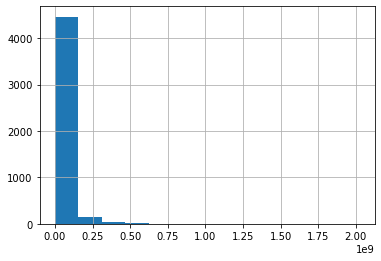

In [7]:
Data1['web_corpus_freq'].hist(bins=13)
plt.show()

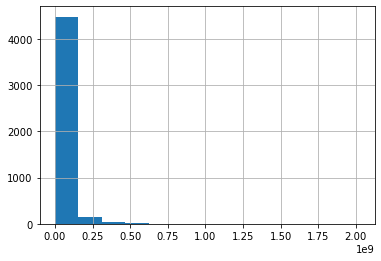

In [8]:
Data1_miss['web_corpus_freq'].hist(bins=13)
plt.show()

In [9]:
#LOG TRASFORMATION
Data1_log=Data1_miss

Data1_log['web_corpus_freq'] = np.log10(Data1_log['web_corpus_freq'])

word               zoology
length                  16
arousal              8.177
valence              8.647
dominance            8.371
concreteness         6.938
imageability         6.941
familiarity          6.939
aoa                  6.971
semsize              6.912
gender               6.971
polysemy                 1
web_corpus_freq    9.30588
dtype: object word               Christmas
length                     2
arousal                2.057
valence                 1.03
dominance              1.941
concreteness           1.636
imageability           1.737
familiarity            1.647
aoa                    1.219
semsize                1.375
gender                   1.0
polysemy                   0
web_corpus_freq     4.106191
dtype: object


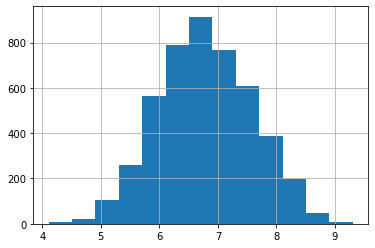

In [10]:

Data1_log['web_corpus_freq'].hist(bins=13)
print(Data1_log.max(), Data1_log.min())
plt.show()

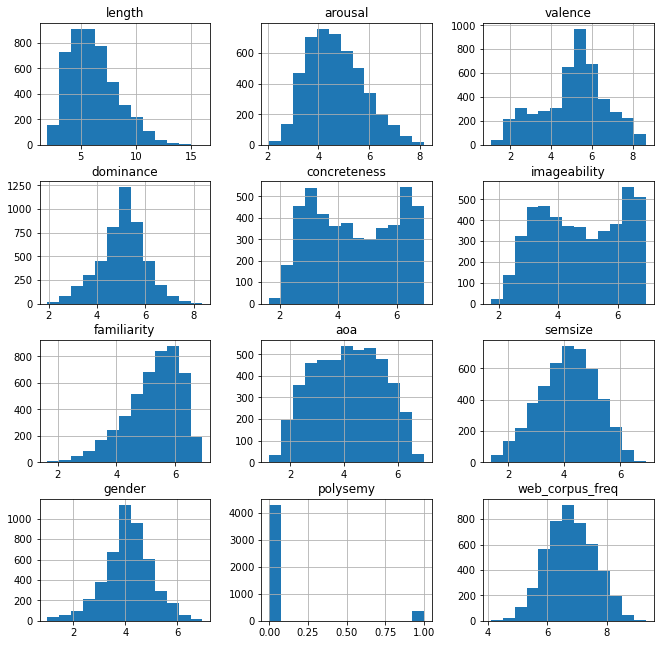

In [11]:
Data1_log.hist(bins=13, figsize=(11,11))
plt.show()

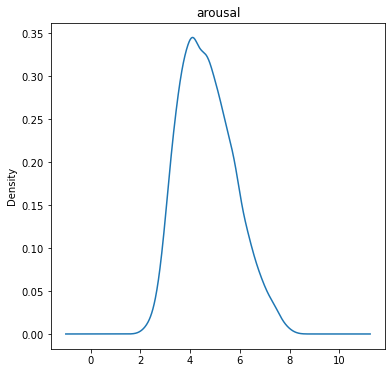

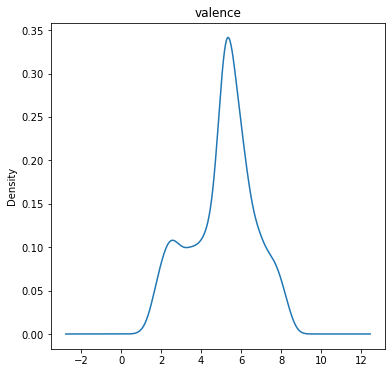

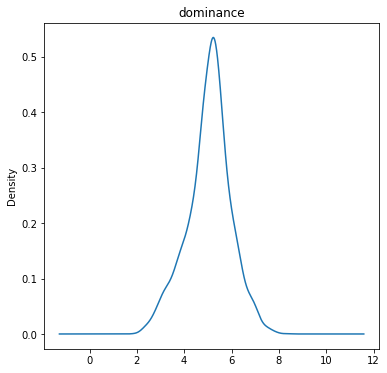

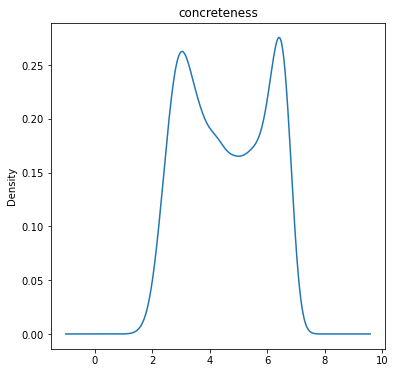

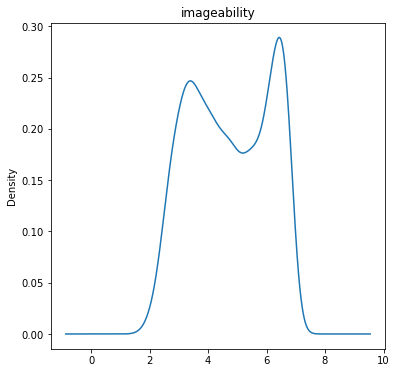

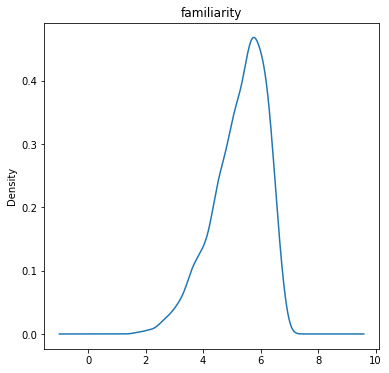

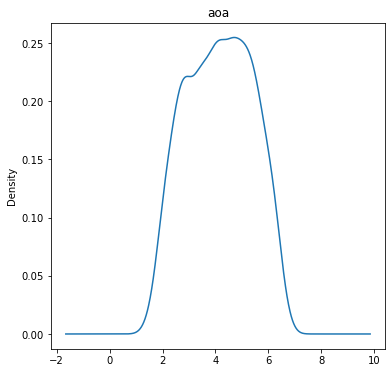

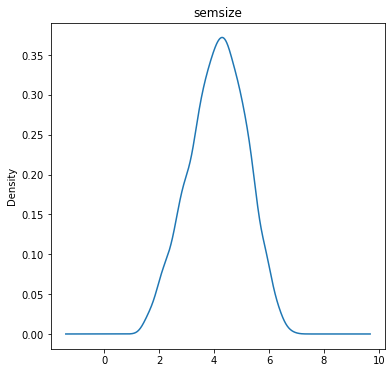

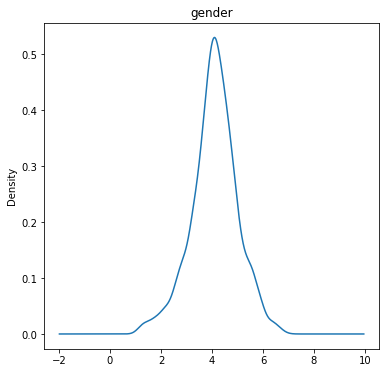

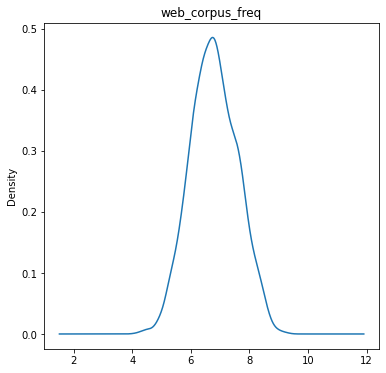

In [12]:
cols = [col for col in Data1.columns if col != 'word']      # elimino word
cols = [col for col in cols if col != 'polysemy']           # elimino polysemy
cols = [col for col in cols if col != 'length']             # elimino length
for i in cols:
    Data1_log[i].plot(kind='kde', figsize=(6,6))
    plt.title(i)
    plt.show()

In [13]:
# Eliminazione attributes e Normalizzo

cols = [col for col in Data1.columns if col != 'word']      # elimino word
cols = [col for col in cols if col != 'polysemy']           # elimino polysemy
#cols = [col for col in cols if col != 'length']             # elimino length
cols = [col for col in cols if col != 'concreteness']       # elimino concreteness     correlato con imageability
cols = [col for col in cols if col != 'dominance']          # elimino dominance        correlato con valence
cols = [col for col in cols if col != 'familiarity']        # elimino familiarity      correlato con aoa
#cols = [col for col in cols if col != 'web_corpus_freq']   # elimino web_corpus_freq
#cols = [col for col in Data1.columns if col != 'word']     # reinserisco tutto tranne word

X = Data1_log[cols].values

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

In [14]:
cols

['length',
 'arousal',
 'valence',
 'imageability',
 'aoa',
 'semsize',
 'gender',
 'web_corpus_freq']

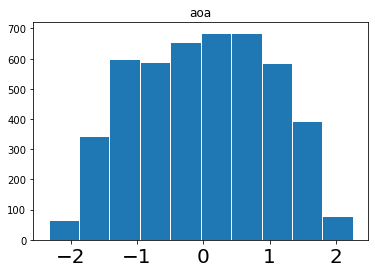

In [15]:
plt.hist(X_scal[:,4], edgecolor='white')
plt.title(cols[4])

plt.xticks(fontsize=20)
plt.show()

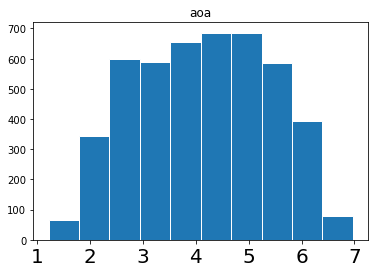

In [16]:
plt.hist(X[:,4], edgecolor='white')
plt.title(cols[4])
plt.xticks(fontsize=20)
plt.show()

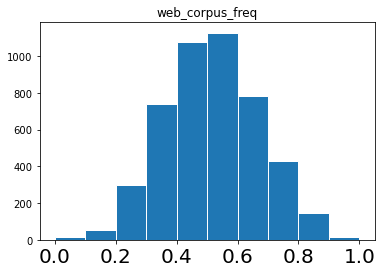

In [17]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

plt.hist(X_minmax[:,7], edgecolor='white')
plt.title(cols[7])
plt.xticks(fontsize=20)
plt.show()

In [18]:
kmeans = KMeans( n_clusters=6, n_init=10, max_iter=200)
kmeans.fit(X_minmax)

KMeans(max_iter=200, n_clusters=6)

In [19]:
kmeans.labels_

array([2, 2, 2, ..., 5, 3, 2])

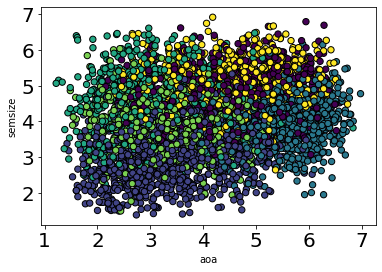

In [20]:
plt.scatter( X[:,4], X[:,5], s=40, edgecolor='black', c= kmeans.labels_ )

plt.xlabel(cols[4])
plt.ylabel(cols[5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [21]:
kmeans.cluster_centers_

array([[0.3492889 , 0.49752377, 0.2239604 , 0.53620915, 0.5902703 ,
        0.62897364, 0.62796234, 0.44757893],
       [0.25761223, 0.31142414, 0.53474818, 0.8446419 , 0.39021525,
        0.31299663, 0.52731505, 0.48496731],
       [0.36532043, 0.32655477, 0.45409647, 0.34608084, 0.76293435,
        0.48026235, 0.53323384, 0.41720115],
       [0.27858312, 0.56625269, 0.69045831, 0.835302  , 0.31249075,
        0.5801531 , 0.46951126, 0.60809774],
       [0.2336173 , 0.35097515, 0.53439494, 0.38877146, 0.39058559,
        0.46556996, 0.50022484, 0.65738115],
       [0.39606684, 0.63581555, 0.78185499, 0.37399164, 0.59990695,
        0.67063075, 0.44468115, 0.5389113 ]])

In [22]:
centers = kmeans.cluster_centers_

In [23]:
centers = scaler.inverse_transform(centers)

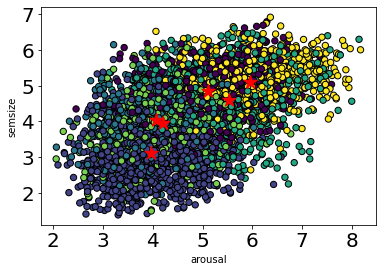

In [24]:
plt.scatter( X[:,1], X[:,5], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( centers[:,1], centers[:,5], c='red', marker='*', s=200 )

plt.xlabel(cols[1])
plt.ylabel(cols[5])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

# parallel coordinate only for kmeans, nel dbscan non abbiamo i centroid e quindi non lo possiamo vedere

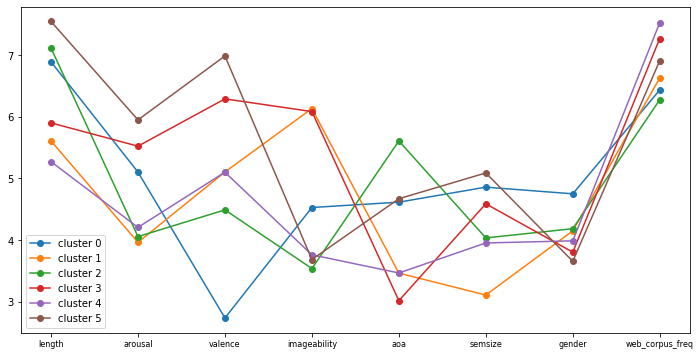

In [25]:
#X_meno=Data1.drop(['word','length','concreteness','dominance','familiarity','web_corpus_freq', 'polysemy'], axis=1)
X_meno=Data1_log[cols]

plt.figure(figsize=(12, 6))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(X_meno.columns)),X_meno.columns, fontsize=8)
plt.legend(fontsize=10)
plt.show()
#abbiamo un buon cluster perché sono ben separate tra di loro, i gruppi nel dataset sono ben separati tra di loro

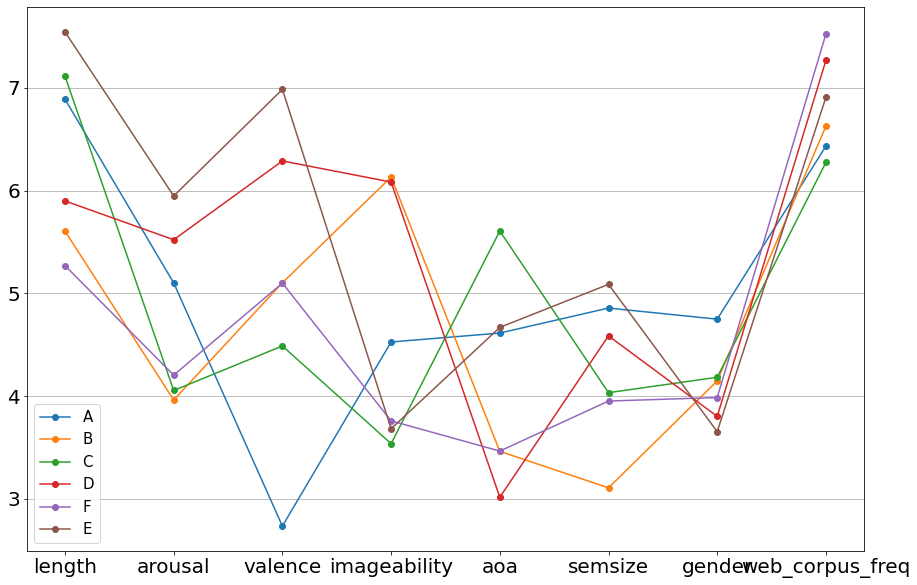

In [26]:
plt.figure(figsize=(15, 10))

clust_name = ['A', 'B', 'C', 'D','F','E']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(cols)), cols, fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=15, loc='best')
plt.grid(axis='y')

<Figure size 1080x720 with 0 Axes>

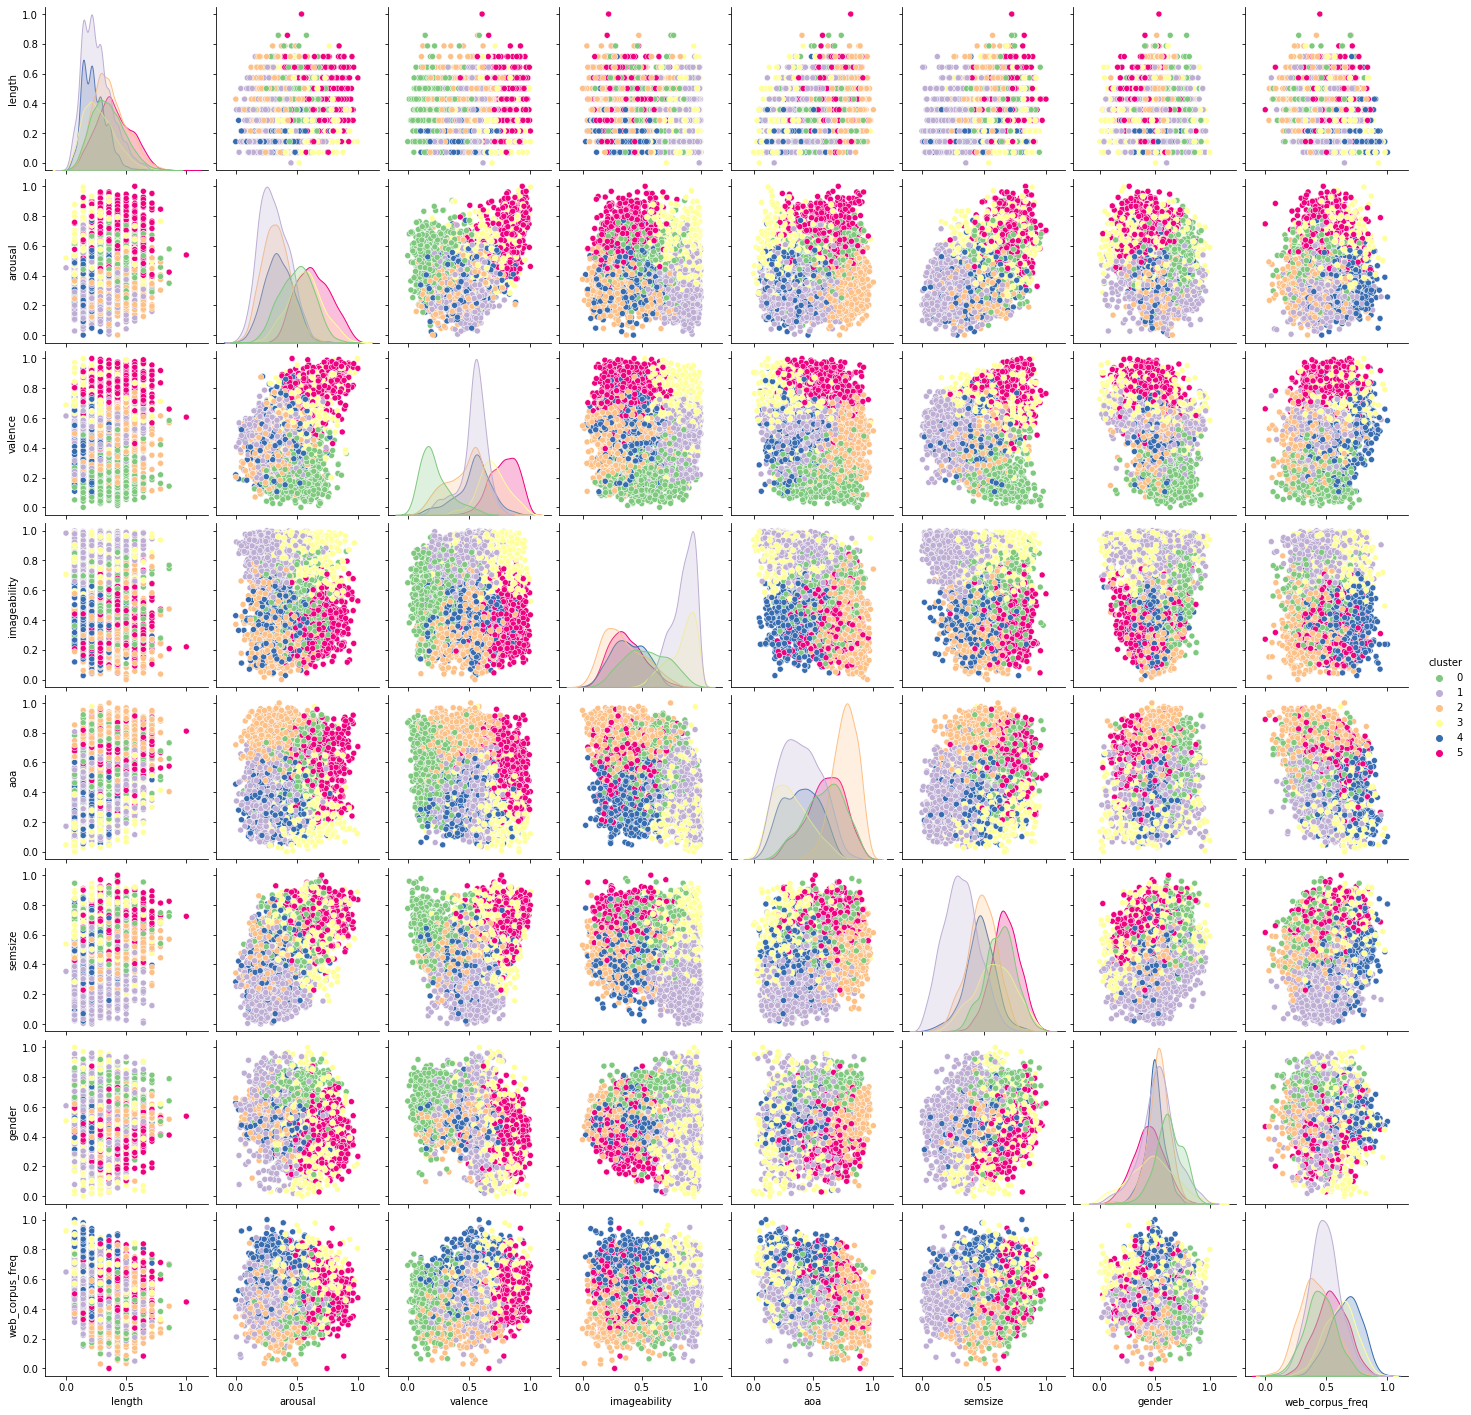

In [27]:
scaled_array = scaler.fit_transform(X_meno)
scaled_df = pd.DataFrame( scaled_array, columns = X_meno.columns )

scaled_df["cluster"] = kmeans.labels_
scaled_df.head()

plt.figure(figsize = (15,10))
sb.pairplot(data= scaled_df, hue ="cluster", palette = "Accent")
plt.show()

[]

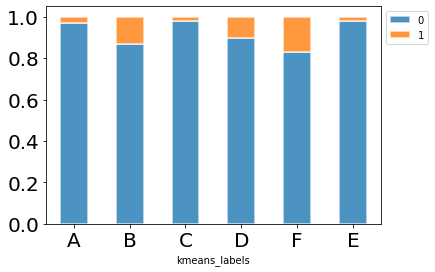

In [28]:
Data1_log['kmeans_labels'] = kmeans.labels_

bar_pl = Data1_log['polysemy'].groupby(Data1_log['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

[]

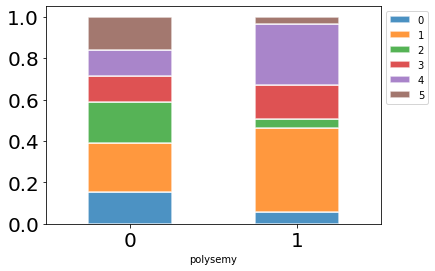

In [29]:
Data1_log['kmeans_labels'] = kmeans.labels_

b=0
b=(Data1_log['polysemy'].unique())
b.sort()
str(b)
clust_poly= b

bar_pl = Data1_log['kmeans_labels'].groupby(Data1_log['polysemy']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_poly)), clust_poly, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()
#plot che puo' essere usatao anche per gli altri metodi di clustering

In [30]:
a=0
a=(Data1_log['length'].unique())
a.sort()
str(a)

'[ 2  3  4  5  6  7  8  9 10 11 12 13 14 16]'

[]

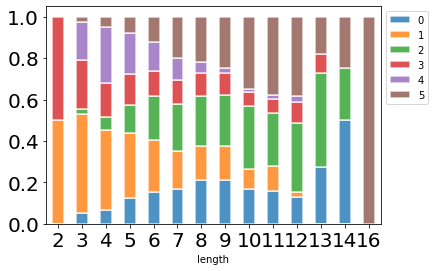

In [31]:
Data1_log['kmeans_labels'] = kmeans.labels_

clust_length = a

bar_pl = Data1_log['kmeans_labels'].groupby(Data1_log['length']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_length)), clust_length, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()
# fare il plot con alla base i cluster

In [32]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([ 673, 1185,  855,  613,  655,  701], dtype=int64))

In [33]:
print('SSE', kmeans.inertia_)                      #più piccolo è meglio è
print('Silhouette', silhouette_score(X, kmeans.labels_))

SSE 693.5573814480551
Silhouette 0.12483540241794461


In [37]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append( kmeans.inertia_ )

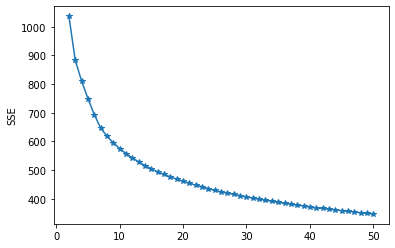

In [38]:
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.22426939801592358
For n_clusters = 3 The average silhouette_score is : 0.21132928033442894
For n_clusters = 4 The average silhouette_score is : 0.19249761221203363
For n_clusters = 5 The average silhouette_score is : 0.16717929086066174
For n_clusters = 6 The average silhouette_score is : 0.17135844449900564
For n_clusters = 7 The average silhouette_score is : 0.16742387095118616
For n_clusters = 8 The average silhouette_score is : 0.1644938618901149


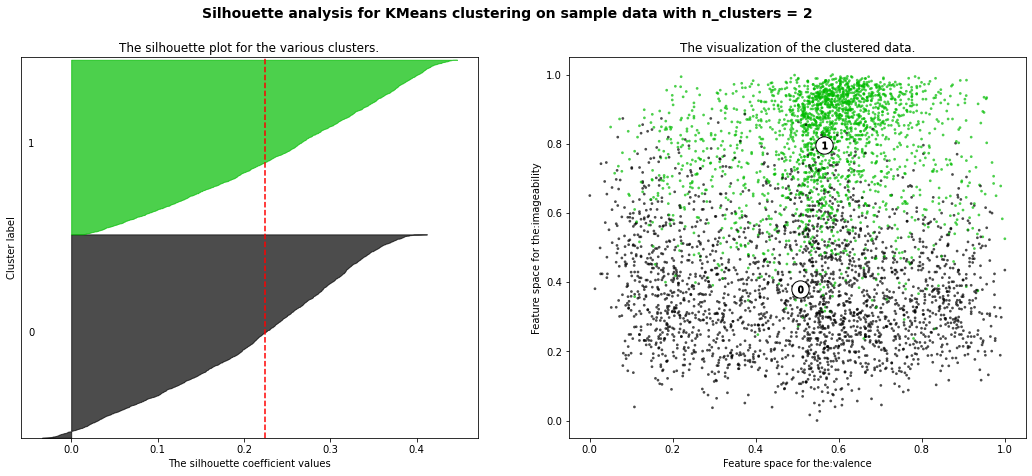

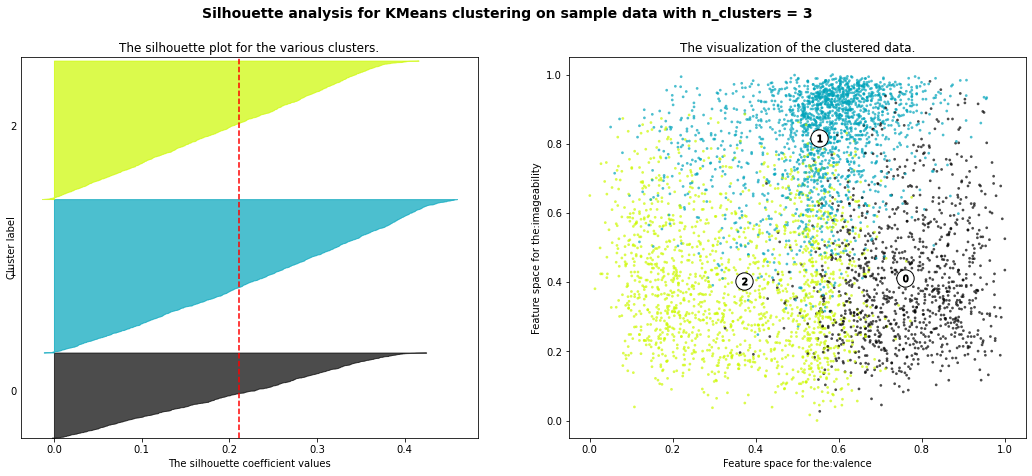

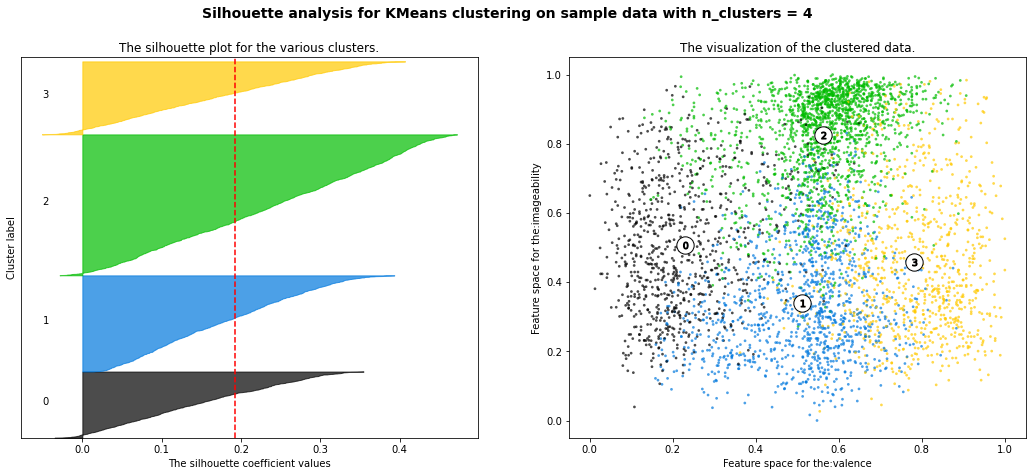

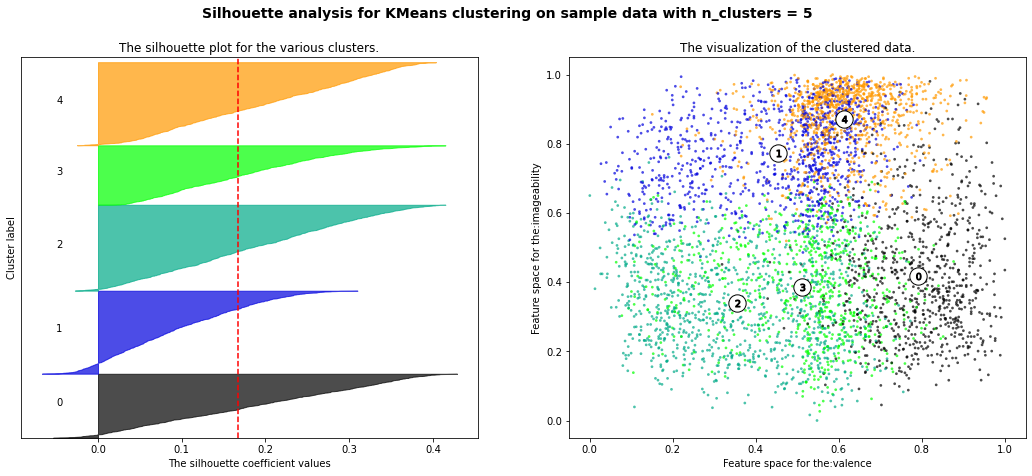

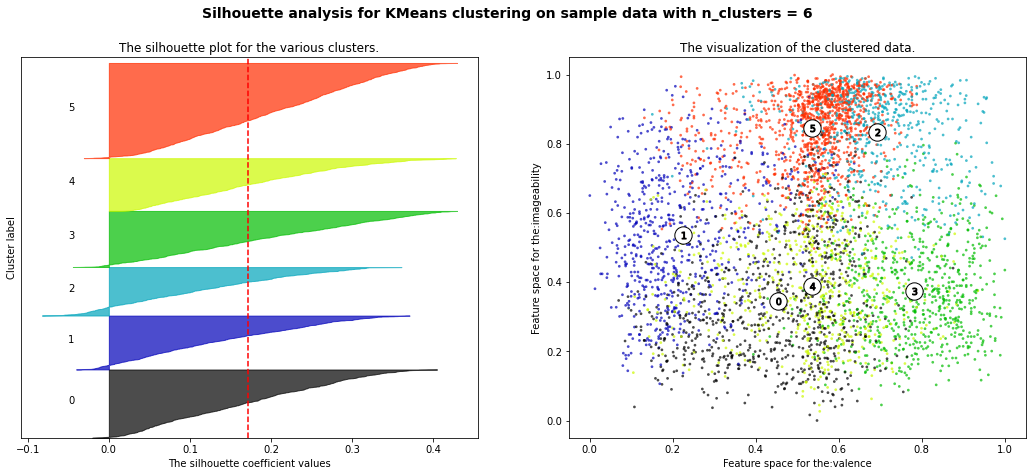

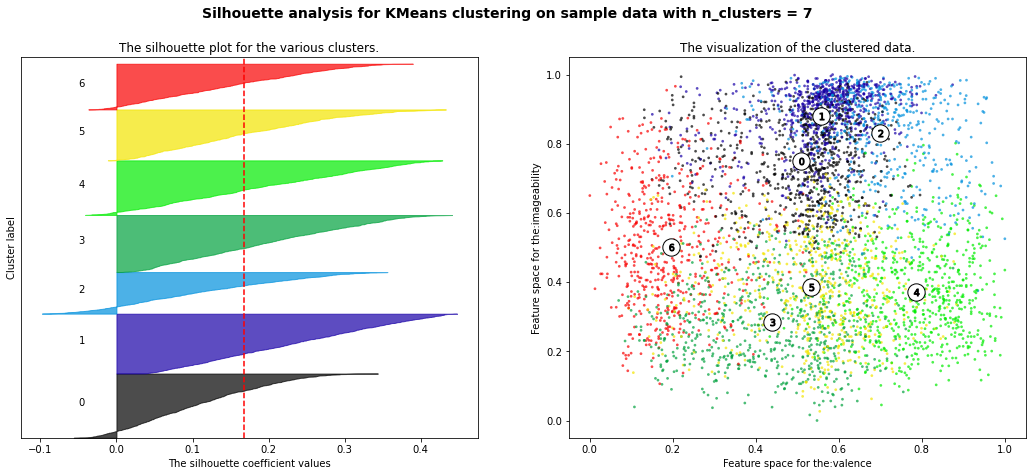

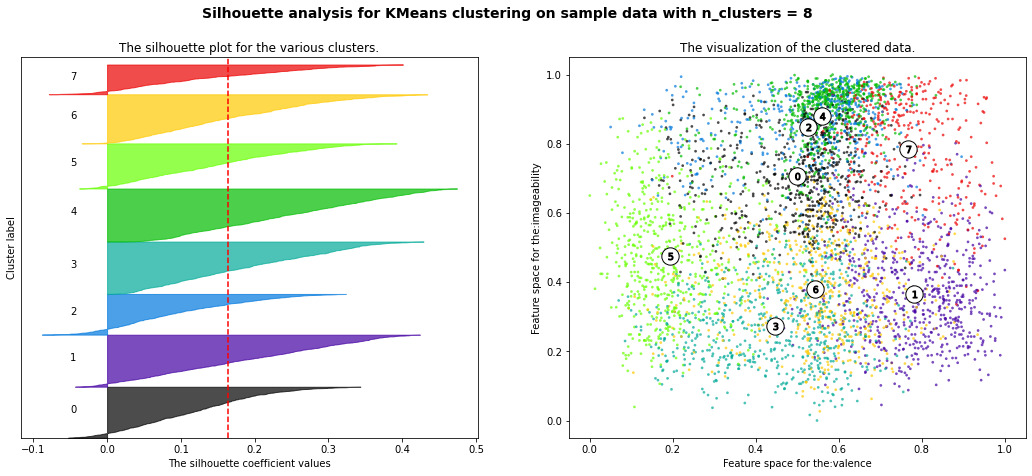

In [39]:
################## va modificatoo #############################

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_meno) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
    cluster_labels = clusterer.fit_predict(X_minmax)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_minmax, cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",
        silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_minmax, cluster_labels)
    y_ticks = []
    y_lower =  y_upper = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower += len(ith_cluster_silhouette_values) 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    avg_score = np.mean(silhouette_avg) #da rinominare!!!!!!!!!!!!!
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(avg_score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_minmax[:, 2], X_minmax[:, 3], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 2],
        centers[:, 3],
        marker="o",
        c="white",
        alpha=1,
        s=300,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[3], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data." )
    ax2.set_xlabel("Feature space for the:"+cols[2])
    ax2.set_ylabel("Feature space for the:"+cols[3])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# il metodo migliore lo scegli in base a quello che vuoi tu, perchè i metodi lavorano in maniera diversa


# DBSCAN (density-based clustering
CORE POINT                   
BORDER POINT                
NOISE POINT

In [75]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [101]:
dbscan=DBSCAN(eps=0.27,min_samples=5, metric='euclidean')
dbscan.fit(X_minmax)
dbscan.labels_ # -1 is a noise

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

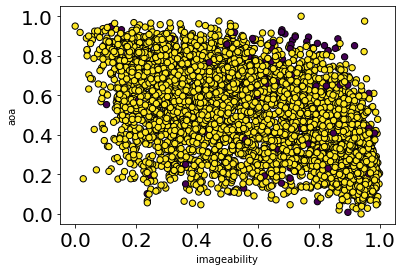

In [102]:
plt.scatter(X_minmax[:,3],X_minmax[:,4], s=40, edgecolor='black', c=dbscan.labels_)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(cols[3])
plt.ylabel(cols[4])
plt.show()

# DBSCAN  è usato anche per identificare gli outliers, puoi paragonare quelli trovati con il boxplo e quelli con il DBSCAN

In [48]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)
dist[0] # distance dei punti dal primo punto

array([0.        , 0.732735  , 0.65258084, ..., 0.86611495, 1.15335464,
       0.55827082])

In [49]:
k=5 #cerchiamo il vaolore eps migliore per min_samples=5 (preso come ipotesi)
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

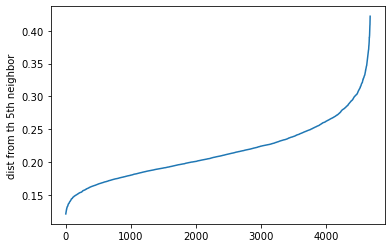

In [50]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 5th neighbor')
         
plt.show() # valore migliore eps tra 0,3 e 0,35 se scegli 5 come min_samples

# in glasgow norms abbiabbiamo prprio una globular for,m, quindi sicuramente DBSCAN lavora male rispetto agli altri

# Hierarichical----------------

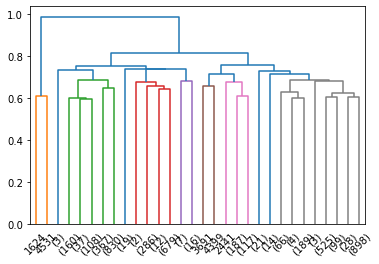

In [70]:
data_dist = pdist(X_minmax, 'euclidean')
data_link = linkage(data_dist, method='average')#dobbiamo scegliere il metodo per selezionare, single, comlete, average
                                        #ogni volta che usi un metodo ti da risultati deversi, scegli qullo che ti piace di più e commentali nel report
res= dendrogram(data_link, truncate_mode='lastp') # dobbiamo usare il metodo TRUNCATED_MODE per evitare di stampare tutti i punti che è impossibile vedere tutti i 4800 punti

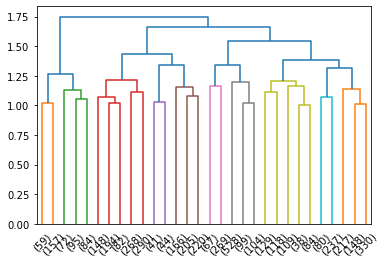

In [71]:
data_dist = pdist(X_minmax, 'euclidean')
data_link = linkage(data_dist, method='complete')#dobbiamo scegliere il metodo per selezionare, single, comlete, average
                                        #ogni volta che usi un metodo ti da risultati deversi, scegli qullo che ti piace di più e commentali nel report
res= dendrogram(data_link, truncate_mode='lastp') # dobbiamo usare il metodo TRUNCATED_MODE per evitare di stampare tutti i punti che è impossibile vedere tutti i 4800 punti

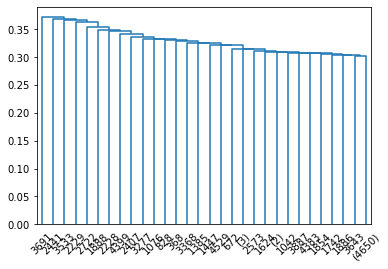

In [72]:
data_dist = pdist(X_minmax, 'euclidean')
data_link = linkage(data_dist, method='single')#dobbiamo scegliere il metodo per selezionare, single, comlete, average
                                        #ogni volta che usi un metodo ti da risultati deversi, scegli qullo che ti piace di più e commentali nel report
res= dendrogram(data_link, truncate_mode='lastp') # dobbiamo usare il metodo TRUNCATED_MODE per evitare di stampare tutti i punti che è impossibile vedere tutti i 4800 punti

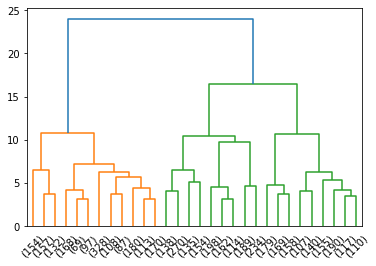

In [73]:
data_dist = pdist(X_minmax, 'euclidean')
data_link = linkage(data_dist, method='ward')#dobbiamo scegliere il metodo per selezionare, single, comlete, average
                                        #ogni volta che usi un metodo ti da risultati deversi, scegli qullo che ti piace di più e commentali nel report
res= dendrogram(data_link, truncate_mode='lastp') # dobbiamo usare il metodo TRUNCATED_MODE per evitare di stampare tutti i punti che è impossibile vedere tutti i 4800 punti

In [64]:
"""altro metodo senza usare la libreria, ma ha come problema il dovere inserire tu il numero di clusters, 
come trucchetto puoi selezionare il numero di cluster che ti esce dal dendogramma"""

hier=AgglomerativeClustering(n_clusters=10 , affinity='euclidean', linkage='complete')
hier.fit(X_minmax)
hier.labels_

array([0, 5, 0, ..., 3, 7, 3], dtype=int64)

AttributeError: 'AgglomerativeClustering' object has no attribute 'plot'

In [63]:
# oppure
hier=AgglomerativeClustering(n_clusters=10 , affinity='precomputed', linkage='single')
hier.fit(dist)
hier.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# nel report, se qualcosa non torna, spiega i parametri utilizzati, come hai normalizzato
# nella discussione finale esempio"la mia target value si comporta meglio con un metodo che con u altro
# un altro metodo per valutare un clustering  controllare le dimensioni dei vari cluster